# OpenAI client setup

In [7]:
!pip install python-dotenv openai

In [2]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get the API key from environment variables
api_key = os.environ.get("OPENAI_API_KEY")

# Throw exception if API key is not set or empty
if not api_key or api_key == "":
    raise ValueError("OpenAI API key is not set. Please add it to the .env file.")

from openai import OpenAI
client = OpenAI()

# Simple LLM call

In [4]:
completion = client.chat.completions.create(
    model="gpt-4.1",
    messages=[
        {
            "role": "user",
            "content": "Hi, my name is bob."
        }
    ]
)

print(completion.choices[0].message.content)

Hi Bob! Nice to meet you. How can I help you today?


# Does an LLM remember my name?

In [5]:
completion = client.chat.completions.create(
    model="gpt-4.1",
    messages=[
        {
            "role": "user",
            "content": "what is my name?"
        }
    ]
)

print(completion.choices[0].message.content)

I don’t have access to personal information like your name unless you tell me. If you’d like to share your name, feel free! Otherwise, how can I help you today?


# LLM with simple memory

In [5]:
messages: list[dict[str, str]] = []
while True:
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit", "bye"]:
        print("Assistant: Goodbye!")
        break
    messages.append({"role": "user", "content": user_input})
    completion = client.chat.completions.create(
        model="gpt-4.1",
        messages=messages
    )
    assistant_response = completion.choices[0].message.content
    messages.append({"role": "assistant", "content": assistant_response})
    print(f"Assistant: {assistant_response}")
print(f"\nConversation ended. Total messages: {len(messages)}")
print(f"\nChat: {messages}")

You:  hi


Assistant: Hello! How can I help you today? 😊


You:  my name is bob


Assistant: Hi Bob! Nice to meet you. How can I assist you today?


You:  what is my name?


Assistant: Your name is Bob!


You:  bye


Assistant: Goodbye!

Conversation ended. Total messages: 6

Chat: [{'role': 'user', 'content': 'hi'}, {'role': 'assistant', 'content': 'Hello! How can I help you today? 😊'}, {'role': 'user', 'content': 'my name is bob'}, {'role': 'assistant', 'content': 'Hi Bob! Nice to meet you. How can I assist you today?'}, {'role': 'user', 'content': 'what is my name?'}, {'role': 'assistant', 'content': 'Your name is Bob!'}]


# Does LLM have access live or real-time data?

In [6]:
completion = client.chat.completions.create(
    model="gpt-4.1",
    messages=[
        {
            "role": "user",
            "content": "what is apple stock value?"
        }
    ]
)

print(completion.choices[0].message.content)

I don't have access to real-time stock prices. For the most current value of Apple Inc. (AAPL) stock, please check a financial news website, a stock market app, or your brokerage platform. Popular options include Yahoo Finance, Google Finance, Bloomberg, or CNBC.


In [10]:
completion = client.chat.completions.create(
    model="gpt-4.1",
    messages=[
        {
            "role": "user",
            "content": """what is apple stock value? 
            If you don't have access to real-time financial data, please suggest the best tool, API, 
            or data source I can use to retrieve the latest stock value."""
        }
    ]
)

print(completion.choices[0].message.content)

I do not have access to real-time financial data, so I can't provide the current value of Apple (AAPL) stock. However, you can easily retrieve the latest stock value using several reliable tools, APIs, or data sources. Here are some of the best options:

**Free APIs and Data Sources:**

1. **Yahoo Finance API (Unofficial)**
   - Python Library: [`yfinance`](https://pypi.org/project/yfinance/)
   - Example usage:
     ```python
     import yfinance as yf
     apple = yf.Ticker("AAPL")
     print(apple.info['regularMarketPrice'])
     ```
   - Provides data on prices, historical data, dividends, and more.

2. **Alpha Vantage**
   - Website: [https://www.alphavantage.co/](https://www.alphavantage.co/)
   - Free with API key (registration required)
   - Example endpoint: `https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol=AAPL&apikey=YOUR_API_KEY`

3. **Finnhub**
   - Website: [https://finnhub.io/](https://finnhub.io/)
   - Free tier available (API key required)
   - Example en

# Native LLM Tools API

In [8]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.4 MB/s eta 0:00:00m eta -:--:--
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.9-cp311-cp311-macosx_14_0_arm64.whl size=273731 sha256=4b99a9d5fb65e3838bb43162764201b491fbca39580755a7e3ba38f343944e37
  Stored in directory: /Users/ez/Library/Caches/pip/wheels/f4/14/e4/50c88c865833085aeb91e2bd40e3a683ff434806386b8ee7bc
Successfully built peewee


In [60]:
import yfinance as yf

def get_stock_price(symbol:str):
    stock_data = yf.Ticker(symbol)
    return stock_data.info["currentPrice"]


stock_price = get_stock_price("AAPL")
print(stock_price)

196.98


In [62]:
tools = [{
    "type": "function",
    "function": {
        "name": "get_stock_price",
        "description": "Get the current stock price for a given company symbol using yfinance.",
        "parameters": {
            "type": "object",
            "properties": {
                "symbol": {
                    "type": "string",
                    "description": "Stock ticker symbol, e.g., AAPL for Apple, TSLA for Tesla"
                }
            },
            "required": ["symbol"],
            "additionalProperties": False
        },
        "strict": True
    }
}]

completion = client.chat.completions.create(
    model="gpt-4.1",
    messages=[{"role": "user", "content": "what is apple stock value?"}],
    tools=tools
)

print(completion.choices[0].message.tool_calls)

[ChatCompletionMessageToolCall(id='call_bD7V8fLtweyrcs17AdTLmXxG', function=Function(arguments='{"symbol":"AAPL"}', name='get_stock_price'), type='function')]


In [30]:
completion = client.chat.completions.create(
    model="gpt-4.1",
    messages=[{"role": "user", "content": "what is the weather today?"}],
    tools=tools
)

print("tool_calls: ", completion.choices[0].message.tool_calls)
print(completion.choices[0].message)

tool_calls:  None
ChatCompletionMessage(content="I currently don't have real-time access to weather data. If you let me know your location, I can suggest where to find up-to-date weather information or provide tips for checking today's forecast!", refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None)


In [51]:
import json

completion = client.chat.completions.create(
    model="gpt-4.1",
    messages=[{"role": "user", "content": "what is apple stock value?"}],
    tools=tools
)
tool_calls = completion.choices[0].message.tool_calls
print(tool_calls)

for call in tool_calls:
    func_name = call.function.name
    func_args = call.function.arguments
    
    print(f"Function called: {func_name}")
    print(f"Arguments passed: {func_args}")
    
    if (func_name == "get_stock_price"):
        json = json.loads(func_args)
        symbol = json.get("symbol")
        result = get_stock_price(symbol)

[ChatCompletionMessageToolCall(id='call_ICPMMOcHVv1bFZ3OSuqGtlQo', function=Function(arguments='{"symbol":"AAPL"}', name='get_stock_price'), type='function')]
Function called: get_stock_price
Arguments passed: {"symbol":"AAPL"}


In [56]:
import json

messages = [{"role": "user", "content": "what is apple stock value?"}]

completion = client.chat.completions.create(
    model="gpt-4.1",
    messages=messages,
    tools=tools
)
messages.append(completion.choices[0].message)
tool_calls = completion.choices[0].message.tool_calls

for call in tool_calls:
    func_name = call.function.name
    func_args = call.function.arguments
    
    
    if (func_name == "get_stock_price"):
        json = json.loads(func_args)
        symbol = json.get("symbol")
        result = get_stock_price(symbol)
        
        messages.append({
            "role": "tool",
            "tool_call_id": call.id,
            "content": str(result),
        })

        completion = client.chat.completions.create(
            model="gpt-4.1",
            messages=messages,
            tools=tools
        )
        print(completion.choices[0].message.content)
        

Apple's current stock value is $196.98 per share. If you need more details or historical data, let me know!


# LLM tool calling sequance diagram

```mermaid
sequenceDiagram
    participant Client as Python Client
    participant API as OpenAI API
    participant Assistant as AI Assistant
    participant Tools as External Tools
    
    Client->>API: chat.completions.create(messages, tools)
    API->>Assistant: Process request with tools definition
    
    alt Assistant decides to use tool
        Assistant->>API: Return tool_call
        API->>Client: Response with tool_calls
        
        Client->>Tools: Execute tool_call
        Tools->>Client: Tool execution result
        
        Client->>API: Send tool results in new request
        API->>Assistant: Process with tool results
        Assistant->>API: Return final response
        API->>Client: Final response
    else Assistant responds directly
        Assistant->>API: Return text response
        API->>Client: Response without tool_calls
    end
```

# Agent with tool

In [70]:
import json

messages = []
tools = [{
    "type": "function",
    "function": {
        "name": "get_stock_price",
        "description": "Get the current stock price for a given company symbol using yfinance.",
        "parameters": {
            "type": "object",
            "properties": {
                "symbol": {
                    "type": "string",
                    "description": "Stock ticker symbol, e.g., AAPL for Apple, TSLA for Tesla"
                }
            },
            "required": ["symbol"],
            "additionalProperties": False
        },
        "strict": True
    }
}]

while True:
    user_input = input("You: ")
    
    # Exit condition
    if user_input.lower() in ["exit", "quit", "bye"]:
        print("Assistant: Goodbye!")
        break

    # Add user input to messages
    messages.append({"role": "user", "content": user_input})
    
    # Make the API call
    completion = client.chat.completions.create(
        model="gpt-4.1",
        messages=messages,
        tools=tools  # Use tools for function calls
    )
    
    messages.append(completion.choices[0].message)
    
    # Check if there are tool calls (e.g., to get stock price)
    tool_calls = completion.choices[0].message.tool_calls
    if tool_calls:
        for call in tool_calls:
            func_name = call.function.name
            func_args = json.loads(call.function.arguments)  # Parse arguments as JSON
            if func_name == "get_stock_price":
                symbol = func_args.get("symbol")
                if symbol:
                    result = get_stock_price(symbol)  # Fetch stock price
                
                    # Append tool result to the conversation
                    messages.append({
                        "role": "tool",
                        "tool_call_id": call.id,
                        "content": str(result),
                    })
    
                    # Re-run the completion with the updated messages and tools
                    completion = client.chat.completions.create(
                        model="gpt-4.1",
                        messages=messages,
                        tools=tools
                    )
                    
                    # Print the assistant's updated response
                    assistant_response = completion.choices[0].message.content
                    messages.append({"role": "assistant", "content": assistant_response})
                    print(f"Assistant: {assistant_response}")
        
    # Print the assistant's response if no tool call was made
    if not tool_calls:
        assistant_response = completion.choices[0].message.content
        print(f"Assistant: {assistant_response}")
    
# End of the conversation
print(f"\nConversation ended. Total messages: {len(messages)}")
print(f"\nChat: {messages}")


You:  what is stock price of microsoft?


func_name get_stock_price
func_args {'symbol': 'MSFT'}
Assistant: The current stock price of Microsoft (MSFT) is $367.78.


You:  what is my name?


Assistant: You haven’t provided your name yet. If you’d like to share your name, I’ll remember it for our conversation!


You:  my name is bob


Assistant: Nice to meet you, Bob! How can I help you today?


You:  what is stock price of tesla?


func_name get_stock_price
func_args {'symbol': 'TSLA'}
Assistant: The current stock price of Tesla (TSLA) is $241.37.


You:  what is my name?


Assistant: Your name is Bob. How can I assist you further?


You:  bye


Assistant: Goodbye!

Conversation ended. Total messages: 14

Chat: [{'role': 'user', 'content': 'what is stock price of microsoft?'}, ChatCompletionMessage(content=None, refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_Ty0QsbTB8UBMsoVYWUfqBdpP', function=Function(arguments='{"symbol":"MSFT"}', name='get_stock_price'), type='function')]), {'role': 'tool', 'tool_call_id': 'call_Ty0QsbTB8UBMsoVYWUfqBdpP', 'content': '367.78'}, {'role': 'assistant', 'content': 'The current stock price of Microsoft (MSFT) is $367.78.'}, {'role': 'user', 'content': 'what is my name?'}, ChatCompletionMessage(content='You haven’t provided your name yet. If you’d like to share your name, I’ll remember it for our conversation!', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None), {'role': 'user', 'content': 'my name is bob'}, ChatCompletionMessage(content='Nice to meet you, Bob! How can

# Agent with tools

In [76]:
import requests

def get_weather(latitude, longitude):
    response = requests.get(f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m")
    data = response.json()
    return data['current']['temperature_2m']

In [83]:
import json

messages = []
tools = [{
    "type": "function",
    "function": {
        "name": "get_stock_price",
        "description": "Get the current stock price for a given company symbol using yfinance.",
        "parameters": {
            "type": "object",
            "properties": {
                "symbol": {
                    "type": "string",
                    "description": "Stock ticker symbol, e.g., AAPL for Apple, TSLA for Tesla"
                }
            },
            "required": ["symbol"],
            "additionalProperties": False
        },
        "strict": True
    }
},{
    "type": "function",
    "function": {
        "name": "get_weather",
        "description": "Get current temperature for provided coordinates in celsius.",
        "parameters": {
            "type": "object",
            "properties": {
                "latitude": {"type": "number"},
                "longitude": {"type": "number"}
            },
            "required": ["latitude", "longitude"],
            "additionalProperties": False
        },
        "strict": True
    }
}]

while True:
    user_input = input("You: ")
    
    # Exit condition
    if user_input.lower() in ["exit", "quit", "bye"]:
        print("Assistant: Goodbye!")
        break

    # Add user input to messages
    messages.append({"role": "user", "content": user_input})
    
    # Make the API call
    completion = client.chat.completions.create(
        model="gpt-4.1",
        messages=messages,
        tools=tools  # Use tools for function calls
    )
    
    messages.append(completion.choices[0].message)
    
    # Check if there are tool calls (e.g., to get stock price)
    tool_calls = completion.choices[0].message.tool_calls
    if tool_calls:
        for call in tool_calls:
            func_name = call.function.name
            func_args = json.loads(call.function.arguments)  # Parse arguments as JSON
            
            if func_name == "get_stock_price":
                symbol = func_args.get("symbol")
                result = get_stock_price(symbol)
            if func_name == "get_weather":
                latitude = func_args.get("latitude")
                longitude = func_args.get("longitude")
                result = get_weather(latitude, longitude)
            
            # Append tool result to the conversation
            messages.append({
                "role": "tool",
                "tool_call_id": call.id,
                "content": str(result),
            })

            # Re-run the completion with the updated messages and tools
            completion = client.chat.completions.create(
                model="gpt-4.1",
                messages=messages,
                tools=tools
            )
            
            # Print the assistant's updated response
            assistant_response = completion.choices[0].message.content
            messages.append({"role": "assistant", "content": assistant_response})
            print(f"Assistant: {assistant_response}")
        
    # Print the assistant's response if no tool call was made
    if not tool_calls:
        assistant_response = completion.choices[0].message.content
        print(f"Assistant: {assistant_response}")
    
# End of the conversation
print(f"\nConversation ended. Total messages: {len(messages)}")
print(f"\nChat: {messages}")


You:  what is the weather in lisbon?


Assistant: The current temperature in Lisbon is 16.6°C. If you need more detailed weather information, just let me know!


You:  what is the stock price of tesla?


Assistant: The current stock price of Tesla (TSLA) is $241.37. If you need more details or recent trends, feel free to ask!


You:  bye


Assistant: Goodbye!

Conversation ended. Total messages: 8

Chat: [{'role': 'user', 'content': 'what is the weather in lisbon?'}, ChatCompletionMessage(content=None, refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_wtDDLkeStGTSBcFpeGYWgFB4', function=Function(arguments='{"latitude":38.7223,"longitude":-9.1393}', name='get_weather'), type='function')]), {'role': 'tool', 'tool_call_id': 'call_wtDDLkeStGTSBcFpeGYWgFB4', 'content': '16.6'}, {'role': 'assistant', 'content': 'The current temperature in Lisbon is 16.6°C. If you need more detailed weather information, just let me know!'}, {'role': 'user', 'content': 'what is the stock price of tesla?'}, ChatCompletionMessage(content=None, refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_WZOnqrgLYWw9EpjJn2txrI8Y', function=Function(arguments='{"symbol":"TSLA"}', name='get_stock_price

# AI Framework & Tools

In [5]:
!pip install langgraph langchain

  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached jsonpointer-3.0.0-py2.py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.2 MB/s eta 0:00:00
Using cached jsonpatch-1.33-py2.py3-none-any.whl (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.7/633.7 kB 28.3 MB/s eta 0:00:00
Using cached jsonpointer-3.0.0-py2.py3-none-any.whl (7.6 kB)


In [26]:
import requests
import yfinance as yf
from langgraph.prebuilt import create_react_agent

def get_weather(latitude, longitude) -> str:
    """Get weather for a given latitude and longitude."""
    response = requests.get(f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m")
    data = response.json()
    return f"The current temperature is {data['current']['temperature_2m']}°C."

def get_stock_price(symbol: str) -> str:
    """Get the current stock price of a given symbol."""
    stock_data = yf.Ticker(symbol)
    return f"The current price of {symbol} is ${stock_data.info['currentPrice']}."

# Create the LangGraph React agent with the tools
agent = create_react_agent(
    model="gpt-4.1",
    tools=[get_weather, get_stock_price],
    prompt="You are a helpful assistant"
)

messages = []

while True:
    user_input = input("You: ")
    
    # Exit condition
    if user_input.lower() in ["exit", "quit", "bye"]:
        print("Assistant: Goodbye!")
        break        
    messages.append({"role": "user", "content": user_input})    
    response = agent.invoke({"messages": messages})
    ai_message = response["messages"][-1].content
    print(f"Assistant: {ai_message}")
    messages.append(response["messages"][-1])

You:  what is my name?


Assistant: You haven’t shared your name with me yet. If you’d like, you can tell me your name!


You:  bye


Assistant: Goodbye!


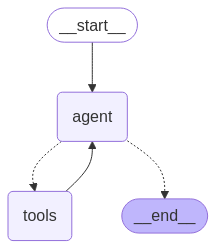

In [27]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        agent.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

# MCP

```mermaid
graph TB
    subgraph YourComputer[" "]
        subgraph AIbasedApp["AI based App<br>(Host)"]
            MCPClient["MCP Client"]
        end
        ServerA["MCP Server A<br>[actions]"]
        ServerB["MCP Server B<br>[actions]"]
        ServerC["MCP Server C<br>[actions]"]
        DSA[(Local Data Source A)]
        DSB((Data Source B))
        RemoteC{Remote Service C}
        
        MCPClient <--> |MCP Protocol| ServerA
        MCPClient <--> |MCP Protocol| ServerB
        MCPClient <--> |MCP Protocol| ServerC
        
        ServerA <--> |Data Access| DSA
        ServerB <--> |Data Access| DSB
        ServerC <--> |Web APIs| RemoteC
    end
    
    style MCPClient fill:#333,stroke:#fff,color:#fff
    style ServerA fill:#333,stroke:#fff,color:#fff
    style ServerB fill:#333,stroke:#fff,color:#fff
    style ServerC fill:#333,stroke:#fff,color:#fff
    style DSA fill:none,stroke:#fff,color:#fff
    style DSB fill:none,stroke:#fff,color:#fff
    style RemoteC fill:none,stroke:#fff,color:#fff
    style AIbasedApp fill:#444,stroke:#fff,color:#fff
    style YourComputer fill:#555,stroke:none,color:#fff
``` 
